## Imports

In [1]:
# Import packages
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, normalized_mutual_info_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import scale, normalize
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, cross_validate, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
%matplotlib inline

C:\Users\kyria\Miniconda3\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
C:\Users\kyria\Miniconda3\envs\py3iaml\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Exploration and Preprocessing of the dataset

In [2]:
base_tgan_adult_path = os.path.join(os.getcwd(), 'Datasets', 'base_tgan_adult_data.csv')
adult_test_path = os.path.join(os.getcwd(), 'Datasets', 'adult_test.csv')
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'Income']

In [3]:
def prep_data(path, columns):

    data = []

    for line in open(path):
        line = line.split(',')

        if line[13] != 'United-States':
            line[13] = 'Non-US'
        else:
            line[13] = 'US'

        if line[3] in ['Preschool', '1st-4th', '5th-6th', '7th-8th']:
            line[3] = 'prim-middle-school'
        elif line[3] in ['9th', '10th', '11th', '12th']:
            line[3] = "high-school"

        line[-1] = line[-1][:-1]

        to_int = lambda a : int(line[a])
        for i in [0,2,4,10,11,12]:
            line[i] = to_int(i)

        data.append(line)
        
    return pd.DataFrame(data, columns=column_names)

In [4]:
adult_train_data = prep_data(base_tgan_adult_path, columns=column_names)
adult_test_data = prep_data(adult_test_path, columns=column_names)

In [5]:
print('Adult train dataset info:')
display(adult_train_data.info())

Adult train dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
age               40000 non-null int64
workclass         40000 non-null object
fnlwgt            40000 non-null int64
education         40000 non-null object
education_num     40000 non-null int64
marital_status    40000 non-null object
occupation        40000 non-null object
relationship      40000 non-null object
race              40000 non-null object
sex               40000 non-null object
capital_gain      40000 non-null int64
capital_loss      40000 non-null int64
hours_per_week    40000 non-null int64
native_country    40000 non-null object
Income            40000 non-null object
dtypes: int64(6), object(9)
memory usage: 4.6+ MB


None

In [6]:
print('Adult test dataset info:')
display(adult_test_data.info())

Adult test dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 15 columns):
age               15060 non-null int64
workclass         15060 non-null object
fnlwgt            15060 non-null int64
education         15060 non-null object
education_num     15060 non-null int64
marital_status    15060 non-null object
occupation        15060 non-null object
relationship      15060 non-null object
race              15060 non-null object
sex               15060 non-null object
capital_gain      15060 non-null int64
capital_loss      15060 non-null int64
hours_per_week    15060 non-null int64
native_country    15060 non-null object
Income            15060 non-null object
dtypes: int64(6), object(9)
memory usage: 1.7+ MB


None

In [7]:
print('Adult train dataset statistical information')
display(adult_train_data.describe())

Adult train dataset statistical information


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,41.153300,125106.216900,10.103425,648.326375,64.622900,46.299575
std,12.874321,94094.621888,2.440067,6915.846497,378.791143,10.866638
min,18.000000,10630.000000,2.000000,0.000000,0.000000,7.000000
25%,31.000000,27141.250000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,125466.000000,10.000000,0.000000,0.000000,40.000000
75%,51.000000,177823.000000,13.000000,0.000000,0.000000,49.000000
max,84.000000,841693.000000,16.000000,99999.000000,3026.000000,100.000000


In [8]:
print('Adult test dataset statistical information')
display(adult_test_data.describe())

Adult test dataset statistical information


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,15060.000000,1.506000e+04,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,1.896164e+05,10.112749,1120.301594,89.041899,40.951594
std,13.380676,1.056150e+05,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.166550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.779550e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.385888e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [9]:
print('Adult train dataset head:')
display(adult_train_data.head(10))
print('\nAdult train dataset tail:')
display(adult_train_data.tail(10))

Adult train dataset head:


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Income
0,25,Private,296372,Some-college,10,Never-married,Craft-repair,Own-child,Black,Female,0,0,40,US,<=50K
1,50,Private,120898,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,49,US,<=50K
2,32,Private,18006,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,US,<=50K
3,26,Private,192978,HS-grad,9,Never-married,Exec-managerial,Other-relative,White,Male,0,0,44,US,<=50K
4,42,Self-emp-inc,12652,Doctorate,14,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,US,>50K
5,54,Private,220529,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,53,US,<=50K
6,36,Federal-gov,163142,HS-grad,9,Never-married,Sales,Own-child,White,Female,0,0,47,US,<=50K
7,43,Private,23542,Masters,13,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,US,<=50K
8,31,Private,119085,HS-grad,9,Never-married,Other-service,Unmarried,White,Female,0,0,54,US,<=50K
9,54,Private,178628,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Female,0,0,40,US,<=50K



Adult train dataset tail:


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Income
39990,52,Private,132462,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,54,US,<=50K
39991,42,Private,168743,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,10054,0,40,US,>50K
39992,54,State-gov,11888,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,49,US,<=50K
39993,24,Private,139952,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,43,US,<=50K
39994,47,Private,143686,Bachelors,13,Never-married,Exec-managerial,Not-in-family,Asian-Pac-Islander,Female,0,0,44,US,<=50K
39995,65,Federal-gov,120588,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,17,US,>50K
39996,46,Private,13462,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,US,>50K
39997,82,Private,148739,Some-college,10,Never-married,Adm-clerical,Unmarried,White,Female,0,2030,23,US,>50K
39998,27,Private,122348,high-school,4,Never-married,Protective-serv,Own-child,White,Male,0,0,40,US,<=50K
39999,24,State-gov,391178,Some-college,10,Divorced,Adm-clerical,Own-child,White,Female,0,0,40,US,<=50K


In [10]:
print('Adult test dataset head:')
display(adult_test_data.head(10))
print('\nAdult test dataset tail:')
display(adult_test_data.tail(10))

Adult test dataset head:


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Income
0,25,Private,226802,high-school,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,US,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,US,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,US,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,US,>50K
4,34,Private,198693,high-school,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,US,<=50K
5,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,US,>50K
6,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,US,<=50K
7,55,Private,104996,prim-middle-school,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,US,<=50K
8,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,US,>50K
9,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,US,<=50K



Adult test dataset tail:


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Income
15050,48,Private,285570,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,US,<=50K
15051,61,Private,89686,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,48,US,<=50K
15052,31,Private,440129,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,US,<=50K
15053,25,Private,350977,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,US,<=50K
15054,48,Local-gov,349230,Masters,14,Divorced,Other-service,Not-in-family,White,Male,0,0,40,US,<=50K
15055,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,US,<=50K
15056,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,US,<=50K
15057,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,US,<=50K
15058,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,US,<=50K
15059,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,US,>50K


In [11]:
adult_train_data['sex'].value_counts()

Male      26151
Female    13849
Name: sex, dtype: int64

In [12]:
adult_test_data['sex'].value_counts()

Male      10147
Female     4913
Name: sex, dtype: int64

In [13]:
adult_train_data.iloc[0]

age                          25
workclass               Private
fnlwgt                   296372
education          Some-college
education_num                10
marital_status    Never-married
occupation         Craft-repair
relationship          Own-child
race                      Black
sex                      Female
capital_gain                  0
capital_loss                  0
hours_per_week               40
native_country               US
Income                    <=50K
Name: 0, dtype: object

C:\Users\kyria\Miniconda3\envs\py3iaml\lib\site-packages\pandas\core\indexes\api.py:107: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


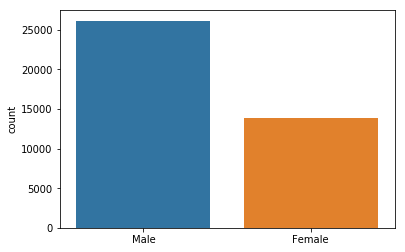

In [14]:
ax = sns.countplot(x='sex', data=pd.concat([adult_train_data.iloc[1:,], adult_train_data.iloc[0]]))
ax.set_xticklabels(['Male', 'Female'])
plt.xlabel('')
plt.show()

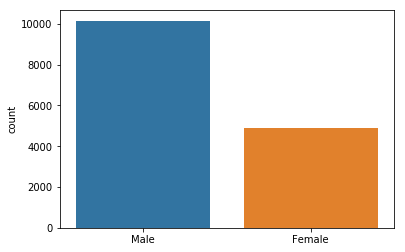

In [15]:
ax = sns.countplot(x='sex', data=adult_test_data)
ax.set_xticklabels(['Male', 'Female'])
plt.xlabel('')
plt.show()

In [16]:
adult_train_data['Income'].value_counts()

<=50K    30235
>50K      9765
Name: Income, dtype: int64

In [17]:
adult_test_data['Income'].value_counts()

<=50K    11360
>50K      3700
Name: Income, dtype: int64

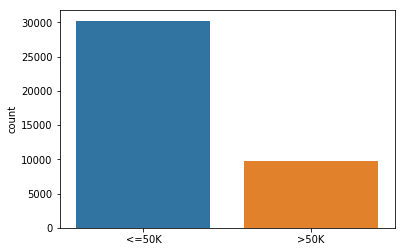

In [18]:
ax = sns.countplot(x='Income', data=adult_train_data)
ax.set_xticklabels(['<=50K', '>50K'])
plt.xlabel('')
plt.show()

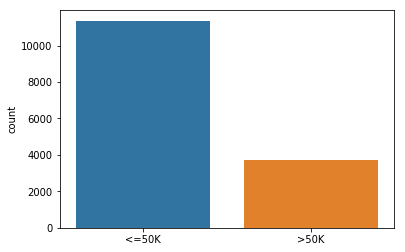

In [19]:
ax = sns.countplot(x='Income', data=adult_test_data)
ax.set_xticklabels(['<=50K', '>50K'])
plt.xlabel('')
plt.show()

Text(0,0.5,'Income')

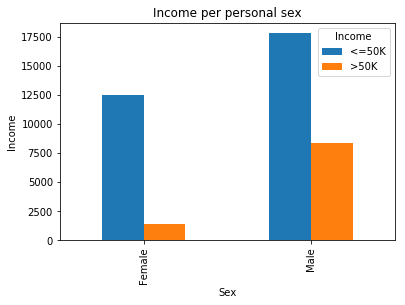

In [20]:
pd.crosstab(adult_train_data['sex'], adult_train_data['Income']).plot(kind='bar')
plt.title('Income per personal sex')
plt.xlabel('Sex')
plt.ylabel('Income')

Text(0,0.5,'Income')

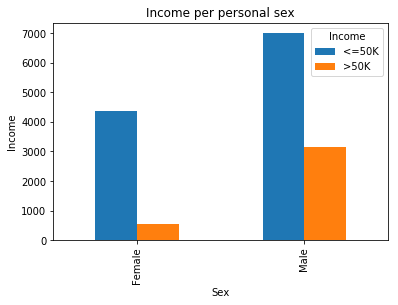

In [21]:
pd.crosstab(adult_test_data['sex'], adult_test_data['Income']).plot(kind='bar')
plt.title('Income per personal sex')
plt.xlabel('Sex')
plt.ylabel('Income')

## Mutual Information

In [22]:
normalized_mutual_info_score(adult_train_data['sex'], adult_train_data['Income'])

0.05373885642274243

In [23]:
normalized_mutual_info_score(adult_test_data['sex'], adult_test_data['Income'])

0.042508930069762786

## Splitting Data

In [24]:
features = adult_train_data.drop(['fnlwgt', 'Income'], axis=1)
features = pd.get_dummies(features)

In [25]:
test_features = adult_test_data.drop(['fnlwgt', 'Income'], axis=1)
test_features = pd.get_dummies(test_features)

In [26]:
s = pd.get_dummies(adult_train_data['sex'])
test_s = pd.get_dummies(adult_test_data['sex'])

In [27]:
y_df = adult_train_data['Income'].copy()

for i in range(len(y_df)):
    if y_df[i] == '>50K':
        y_df[i] = 1
    else:
        y_df[i] = 0    
        
y = np.asarray(y_df, dtype='float64')

In [28]:
test_y_df = adult_test_data['Income'].copy()

for i in range(len(test_y_df)):
    if test_y_df[i] == '>50K':
        test_y_df[i] = 1
    else:
        test_y_df[i] = 0    
    
test_y = np.asarray(test_y_df, dtype='float64')

In [29]:
print('Training Data shapes:')
print('Features shape: {}'.format(features.shape))
print('Sensitive attribute shape: {}'.format(s.shape))
print('Output label shape: {}'.format(y.shape))

Training Data shapes:
Features shape: (40000, 58)
Sensitive attribute shape: (40000, 2)
Output label shape: (40000,)


In [30]:
print('Test Data shapes:')
print('Features shape: {}'.format(test_features.shape))
print('Sensitive attribute shape: {}'.format(s.shape))
print('Output label shape: {}'.format(test_y.shape))

Test Data shapes:
Features shape: (15060, 58)
Sensitive attribute shape: (40000, 2)
Output label shape: (15060,)


## Disparate Impact (P%-rule)

In [31]:
def p_rule(files):
    df = pd.DataFrame()
    
    for f in files:
        df = pd.concat([df, f], axis=1)
        
    prot_pos = 0
    unprot_pos = 0

    if 'sex' in df.columns:
        for row in df.iterrows():
            if row[1][9] == 'Female' and row[1][-1] == '>50K':
                prot_pos += 1
            elif row[1][9] == 'Male' and row[1][-1] == '>50K': 
                unprot_pos += 1  
                
        total_females = df['sex'].value_counts()[1]
        total_males = df['sex'].value_counts()[0]
        
    if 'Female' in df.columns:
        for row in df.iterrows():
            if row[1][0] == 1 and row[1][-1] == 1:
                prot_pos += 1
            elif row[1][1] == 1 and row[1][-1] == 1: 
                unprot_pos += 1
                
        total_females = df['Female'].value_counts()[1]
        total_males = df['Female'].value_counts()[0]              
    
    prot_per = prot_pos / total_females * 100
    unprot_per = unprot_pos / total_males * 100
    
    train_p_rule = prot_per / unprot_per
    
    print('Number of Females in the positive class (>50K): {}'.format(prot_pos))
    print('Percentage of Females in the positive class (>50K): {:.2f}%'.format(prot_per))
    print('\nNumber of Males in the positive class (>50K): {}'.format(unprot_pos))
    print('Percentage of Males in the positive class (>50K): {:.2f}%'.format(unprot_per))
    print('\nTraining set p-rule: {:.2f}%'.format(train_p_rule * 100))

### P%-rule on training data

In [32]:
p_rule([adult_train_data])

Number of Females in the positive class (>50K): 1413
Percentage of Females in the positive class (>50K): 10.20%

Number of Males in the positive class (>50K): 8352
Percentage of Males in the positive class (>50K): 31.94%

Training set p-rule: 31.95%


### P%-rule on test data

In [33]:
p_rule([adult_test_data])

Number of Females in the positive class (>50K): 557
Percentage of Females in the positive class (>50K): 11.34%

Number of Males in the positive class (>50K): 3143
Percentage of Males in the positive class (>50K): 30.97%

Training set p-rule: 36.60%


## Disparate Mistreatment

In [34]:
def print_disparate_mistreatment_stats(s, y, pred_y):

    prot_FP = 0
    unprot_FP = 0
    
    prot_FN = 0
    unprot_FN = 0
    
    prot_TN = 0
    unprot_TN = 0
    
    prot_TP = 0
    unprot_TP = 0

    for i in range(0, len(s)):
        if s['sex_Female'][i] == 1:
            if y[i] == 1:
                if pred_y[i] != y[i]:
                    prot_FN += 1
                else:
                    prot_TP += 1
            else:
                if pred_y[i] != y[i]:
                    prot_FP += 1
                else:
                    prot_TN += 1
        else:
            if y[i] == 1:
                if pred_y[i] != y[i]:
                    unprot_FN += 1
                else:
                    unprot_TP += 1
            else:
                if pred_y[i] != y[i]:
                    unprot_FP += 1
                else:
                    unprot_TN += 1

    prot_FPR = prot_FP / (prot_FP + prot_TN)
    prot_FNR = prot_FN / (prot_FN + prot_TP)
    if prot_FN == 0 and prot_TN == 0:
        prot_FOR = 0
    else:
        prot_FOR = prot_FP / (prot_FN + prot_TN)
    prot_FDR = prot_FN / (prot_FP + prot_TP)
    
    unprot_FPR = unprot_FP / (unprot_FP + unprot_TN)
    unprot_FNR = unprot_FN / (unprot_FN + unprot_TP)
    if unprot_FN == 0 and unprot_TN == 0:
        unprot_FOR = 0
    else:
        unprot_FOR = unprot_FP / (unprot_FN + unprot_TN)
    unprot_FDR = unprot_FN / (unprot_FP + unprot_TP)

    print()
    print("--- Disparate Mistreatment ---")
    print("# protected False Positive Rate: %.2f" % (prot_FPR))
    print("# unprotected False Positive Rate: %.2f" % (unprot_FPR))
    print()
    print("# protected False Negative Rate: %.2f" % (prot_FNR))
    print("# unprotected False Negative Rate: %.2f" % (unprot_FNR))
    print()
    print("# protected False Omission Rate: %.2f" % (prot_FOR))
    print("# unprotected False Omission Rate: %.2f" % (unprot_FOR))
    print()
    print("# protected False Discovery Rate: %.2f" % (prot_FDR))
    print("# unprotected False Discovery Rate: %.2f" % (unprot_FDR))
    print()

#     return prot_FPR, unprot_FPR, prot_FNR, unprot_FNR, prot_FDR, unprot_FDR, prot_FOR, unprot_FOR

## Multinomial Naive Bayes

In [35]:
multi_nb = MultinomialNB()
multi_nb.fit(X=features, y=y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [36]:
'Class log-priors: {}'.format(multi_nb.class_log_prior_)

'Class log-priors: [-0.27987926 -1.41007489]'

In [37]:
test_pred = multi_nb.predict(X=test_features)

In [38]:
score = accuracy_score(test_y, test_pred)
print('Accuracy score of multinomial Naive Bayes classifier: {}'.format(score))

Accuracy score of multinomial Naive Bayes classifier: 0.7749667994687915


In [39]:
cm_norm = confusion_matrix(test_y, test_pred)/confusion_matrix(test_y, test_pred).sum(axis=1)[:, np.newaxis]

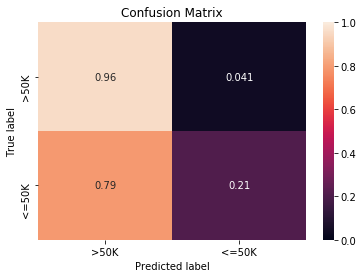

In [40]:
sns.heatmap(cm_norm, xticklabels=['>50K', '<=50K'], yticklabels=['>50K', '<=50K'], vmin=0., vmax=1., annot=True)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
#plt.figure()
plt.show()

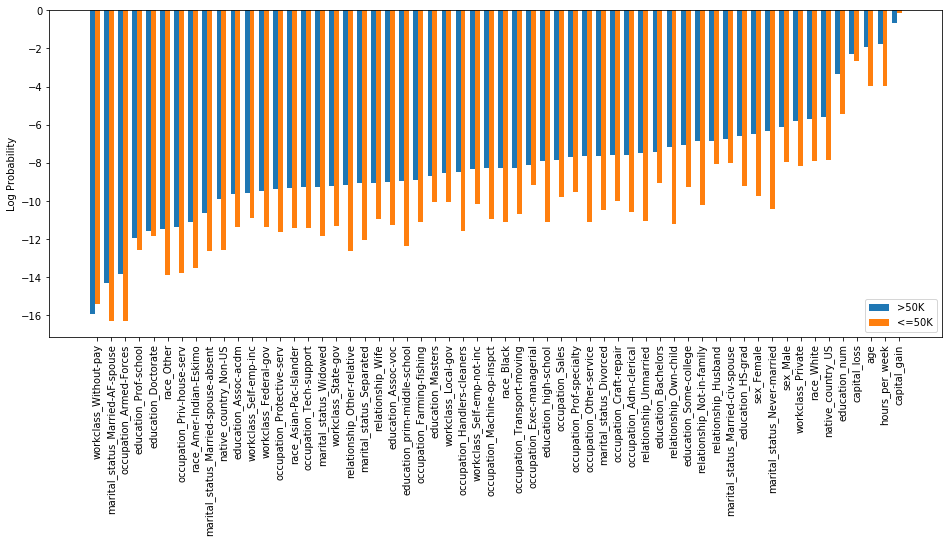

In [41]:
sort_idx = np.argsort(multi_nb.feature_log_prob_[0])
log_probs = multi_nb.feature_log_prob_[:, sort_idx]
ticklabs = features.columns[sort_idx].tolist()

N = len(ticklabs)
ind = np.arange(N)  # the x locations for the groups
width = 0.35        # the width of the bars
fig, ax = plt.subplots(figsize=(16,6))
pos = ax.bar(ind, log_probs[0], width)
neg = ax.bar(ind + width, log_probs[1], width)
ax.set_ylabel('Log Probability')
ax.set_xticks(ind + width)
ax.set_xticklabels(ticklabs, rotation='vertical')
ax.legend((pos[0], neg[0]), ('>50K', '<=50K'), loc='best')
plt.show()

## Logistic Regression

In [42]:
# Creating the logistic regression classifier:
log_reg = LogisticRegression(solver='lbfgs', max_iter=5000)

# Fitting the training data:
fitted = log_reg.fit(features, y)

# Calculating the class predictions:
pred = fitted.predict(test_features)

print('Accuracy of Logistic Regressor: ', fitted.score(test_features, test_y))

Accuracy of Logistic Regressor:  0.8250996015936255


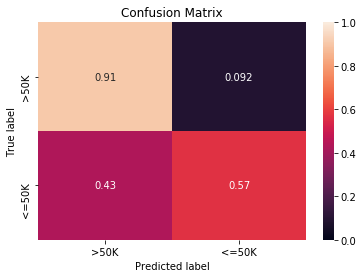

In [43]:
# Creating the confusion matrix:
cm_norm = confusion_matrix(test_y, pred)/confusion_matrix(test_y, pred).sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_norm, xticklabels=['>50K', '<=50K'], yticklabels=['>50K', '<=50K'], vmin=0., vmax=1., annot=True)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
#plt.figure()
plt.show()

#### P%-rule on predictions

In [44]:
test_preds = test_s.copy()
test_preds['Income'] = pred

In [45]:
p_rule([test_preds])

Number of Females in the positive class (>50K): 182
Percentage of Females in the positive class (>50K): 3.70%

Number of Males in the positive class (>50K): 2970
Percentage of Males in the positive class (>50K): 29.27%

Training set p-rule: 12.66%


#### Disparate Mistreatment

In [46]:
print_disparate_mistreatment_stats(test_features, test_y, pred)


--- Disparate Mistreatment ---
# protected False Positive Rate: 0.01
# unprotected False Positive Rate: 0.14

# protected False Negative Rate: 0.75
# unprotected False Negative Rate: 0.37

# protected False Omission Rate: 0.01
# unprotected False Omission Rate: 0.14

# protected False Discovery Rate: 2.31
# unprotected False Discovery Rate: 0.39



### Standardized

In [47]:
# Standardizing the training and testing feature variables to achieve zero mean and unit variance.
stand_X_train = scale(features)
stand_X_test = scale(test_features)

In [48]:
# Creating the logistic regression classifier:
log_reg = LogisticRegression(solver='lbfgs', max_iter=5000)

# Fitting the training data:
fitted = log_reg.fit(stand_X_train, y)

# Calculating the class predictions:
stand_pred = fitted.predict(stand_X_test)

print('Accuracy of Logistic Regressor: ', fitted.score(stand_X_test, test_y))

Accuracy of Logistic Regressor:  0.8273572377158035


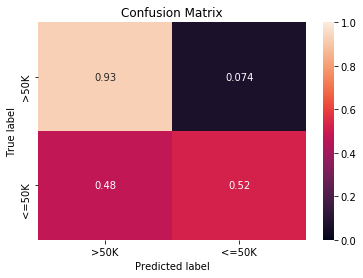

In [49]:
# Creating the confusion matrix:
cm_norm = confusion_matrix(test_y, stand_pred)/confusion_matrix(test_y, stand_pred).sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_norm, xticklabels=['>50K', '<=50K'], yticklabels=['>50K', '<=50K'], vmin=0., vmax=1., annot=True)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
#plt.figure()
plt.show()

#### P%-rule on predictions

In [50]:
test_preds = test_s.copy()
test_preds['Income'] = stand_pred

In [51]:
p_rule([test_preds])

Number of Females in the positive class (>50K): 122
Percentage of Females in the positive class (>50K): 2.48%

Number of Males in the positive class (>50K): 2654
Percentage of Males in the positive class (>50K): 26.16%

Training set p-rule: 9.49%


#### Disaprate Mistreatment

In [52]:
print_disparate_mistreatment_stats(test_features, test_y, stand_pred)


--- Disparate Mistreatment ---
# protected False Positive Rate: 0.01
# unprotected False Positive Rate: 0.12

# protected False Negative Rate: 0.82
# unprotected False Negative Rate: 0.41

# protected False Omission Rate: 0.01
# unprotected False Omission Rate: 0.11

# protected False Discovery Rate: 3.76
# unprotected False Discovery Rate: 0.49



## Decision Tree Classifier

In [53]:
clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, features, adult_train_data['Income'], cv=10)

array([0.78405399, 0.78155461, 0.78230442, 0.77905524, 0.78330417,
       0.77894474, 0.78394599, 0.77819455, 0.78469617, 0.77569392])

In [54]:
np.mean(cross_val_score(clf, features, adult_train_data['Income'], cv=10))

0.7811747800734238

In [55]:
clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, features, adult_train_data['Income'], cv=20)

array([0.7856072 , 0.7806097 , 0.7876062 , 0.77061469, 0.79210395,
       0.7845    , 0.788     , 0.791     , 0.7885    , 0.7775    ,
       0.777     , 0.787     , 0.784     , 0.7825    , 0.786     ,
       0.77888944, 0.78289145, 0.78889445, 0.78489245, 0.77438719])

In [56]:
np.mean(cross_val_score(clf, features, adult_train_data['Income'], cv=20))

0.7836248353312087

## Random Forest Classifier

In [57]:
# Creating the Random Forest Classifier:
rfc = RandomForestClassifier(n_estimators=500, random_state=42, criterion='entropy', max_depth=20)

# Fitting the training data:
rfc_fitted = rfc.fit(features, y)

# Extracting the feature importances:
feature_importances = rfc_fitted.feature_importances_

# Displaying the training and test set accuracies:
print('Accuracy of random forest classifier on the training set: ', rfc_fitted.score(features, y))
print('Accuracy of random forest classifier on the testing set: ', rfc_fitted.score(test_features, test_y))

Accuracy of random forest classifier on the training set:  0.9045
Accuracy of random forest classifier on the testing set:  0.8246347941567065


### Feature importance

In [58]:
# Creating and displaying a dataframe for the top 10 most important features:
feature_importances_df = pd.DataFrame(data = np.array(feature_importances).T, index = features.columns[np.newaxis].T, columns = ['Importance'])
feature_importances_df = feature_importances_df.sort_values(['Importance'], ascending = False)
print('Top 10 features according to the Random Forest Classifier:')
display(feature_importances_df.iloc[0:10])

Top 10 features according to the Random Forest Classifier:


,Importance
"(age,)",0.144093
"(marital_status_Married-civ-spouse,)",0.097917
"(capital_gain,)",0.091620
"(relationship_Husband,)",0.078324
"(education_num,)",0.073274
"(hours_per_week,)",0.071506
"(marital_status_Never-married,)",0.065390
"(capital_loss,)",0.037402
"(occupation_Exec-managerial,)",0.032404
"(sex_Female,)",0.020675


## Neural Networks (Multi-Layer Perceptron)

In [59]:
clf = MLPClassifier()

In [60]:
clf.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'momentum': 0.9,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [61]:
clf.fit(features, y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [62]:
test_pred = clf.predict(test_features)

In [63]:
clf.score(test_features, test_y)

0.8169322709163347

In [64]:
test_preds = test_s.copy()
test_preds['Income'] = test_pred

In [65]:
p_rule([test_preds])

Number of Females in the positive class (>50K): 350
Percentage of Females in the positive class (>50K): 7.12%

Number of Males in the positive class (>50K): 2609
Percentage of Males in the positive class (>50K): 25.71%

Training set p-rule: 27.71%
